In [ ]:
#logistic regression

# Basit Doğrusal Regresyon

## Modelleme

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

## Dosyayı okuma


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)
print(df.head())

Saving housing.csv to housing.csv
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
#df = df.iloc[:,1:len(df)]

In [ ]:
df.head() #ilk beş satır

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
df.info() #bilgi almak için. Kısa zamanda çok bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe().T # komutu, bir Pandas DataFrame'indeki sayısal sütunlar için temel istatistiksel özetleri görüntülemek için kullanılan kullanışlı bir fonksiyondur.

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

In [ ]:
df.rename(columns = {"longitude":"Batı ölçüsü",
                     "latitude":"Kuzey ölçüsü",
                     "housing_median_age":"Ev ortanca yaş",
                     "total_rooms":"Toplam oda",
                    "total_bedrooms":"Toplam yatak oda",
                     "population" :"nüfus",
                     "households":"hane sayısı",
                    "median_income":"ortalama gelir",
                      "median_house_value":"ev ortanca değer",
                    "ocean_proximity":"okyanusa yakınlık" }, inplace = True) #verilerin isminin değiştirilmesi

In [ ]:
df.isnull().values.any() # eksik değerleri (NaN, None) tespit etmek için kullanılır.

True

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

eksik_veriler_var_mi = df.isnull().values.any() #Eksik veri kontrolü

if eksik_veriler_var_mi:
    print("Eksik veriler bulundu!")
    sayisal_degiskenler = ['Batı ölçüsü', 'Kuzey ölçüsü', 'Ev ortanca yaş', 'Toplam oda', 'Toplam yatak oda', 'nüfus', 'hane sayısı', 'ortalama gelir']
    imputer_ortalama = SimpleImputer(strategy='mean') #Eksik veriler ortalama değer ile dolduruldu
    df[sayisal_degiskenler] = imputer_ortalama.fit_transform(df[sayisal_degiskenler])


    print("Eksik veriler dolduruldu.")

else:
    print("Eksik veri yok.")

Eksik veriler bulundu!
Eksik veriler dolduruldu.


<Axes: >

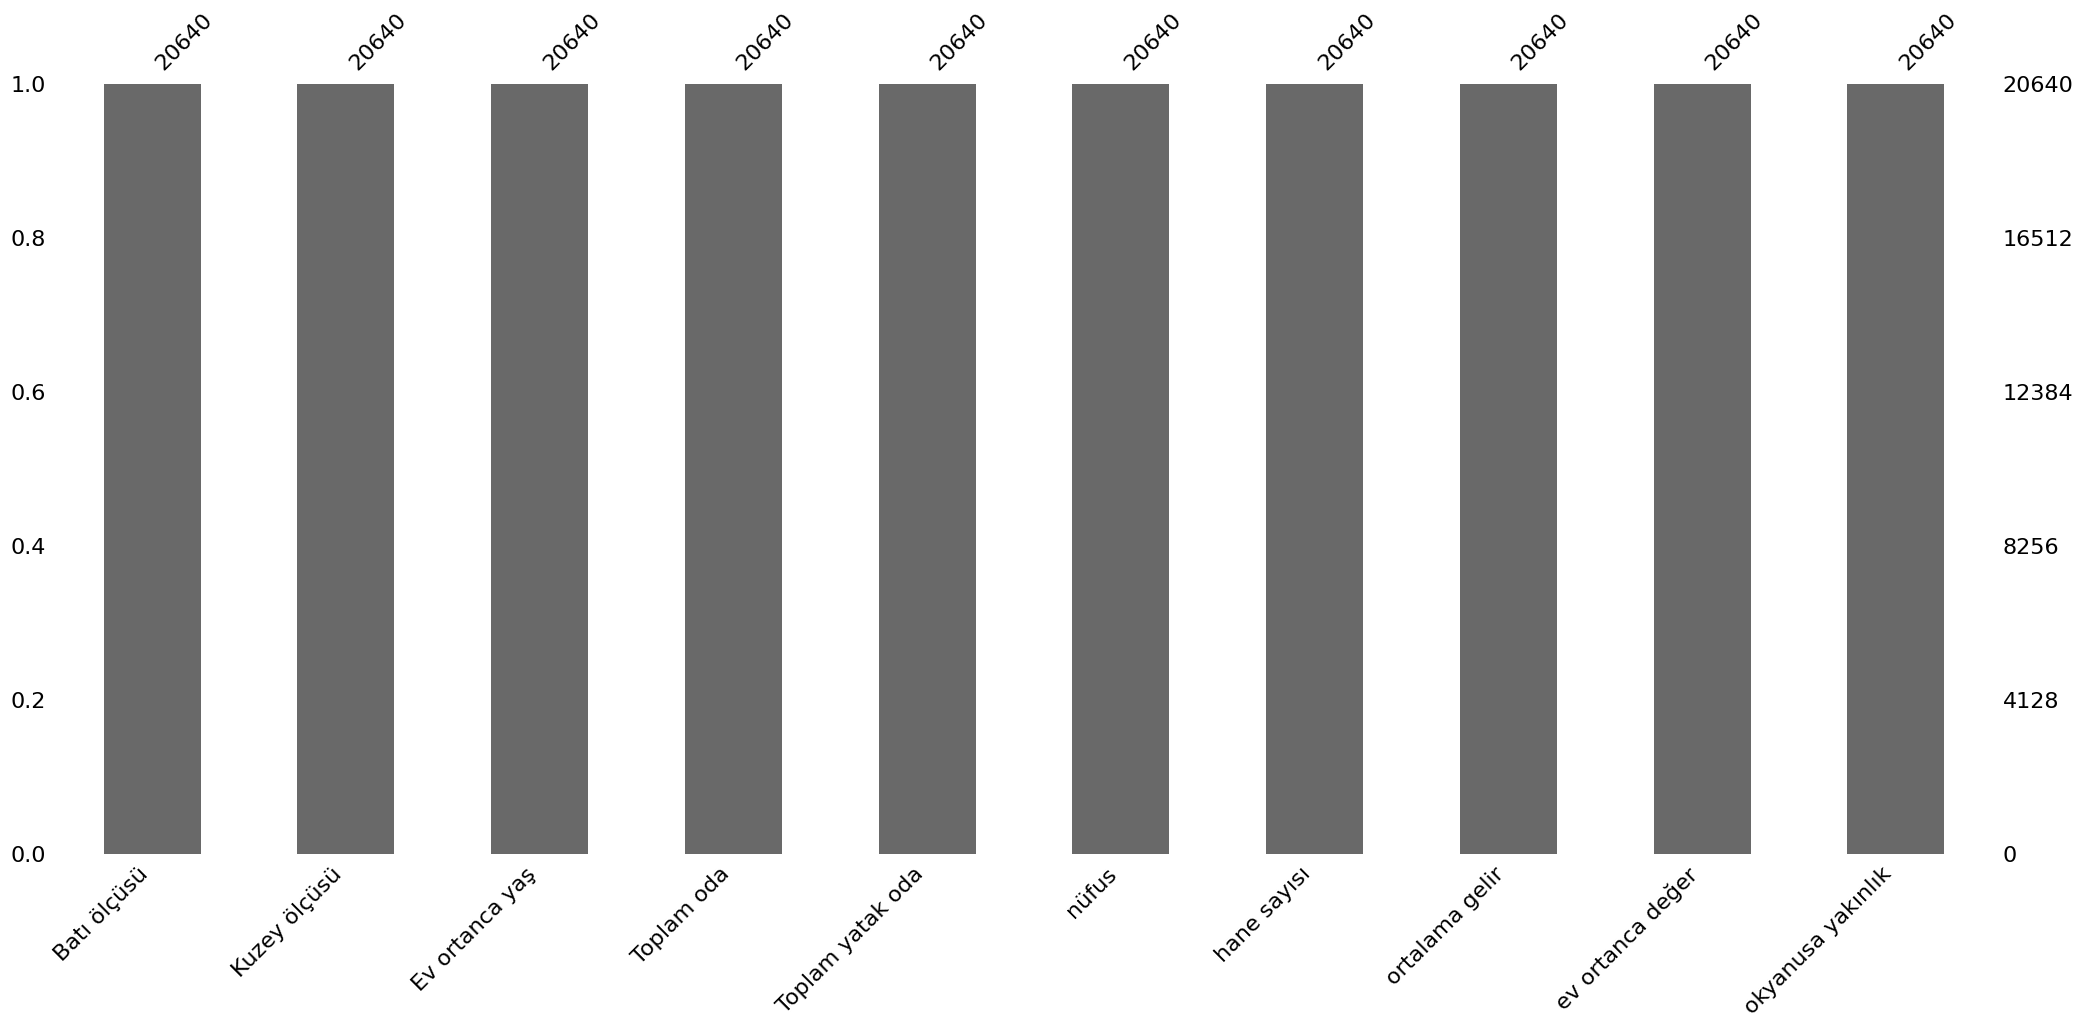

In [ ]:
import missingno as msno
msno.bar(df)

<Axes: >

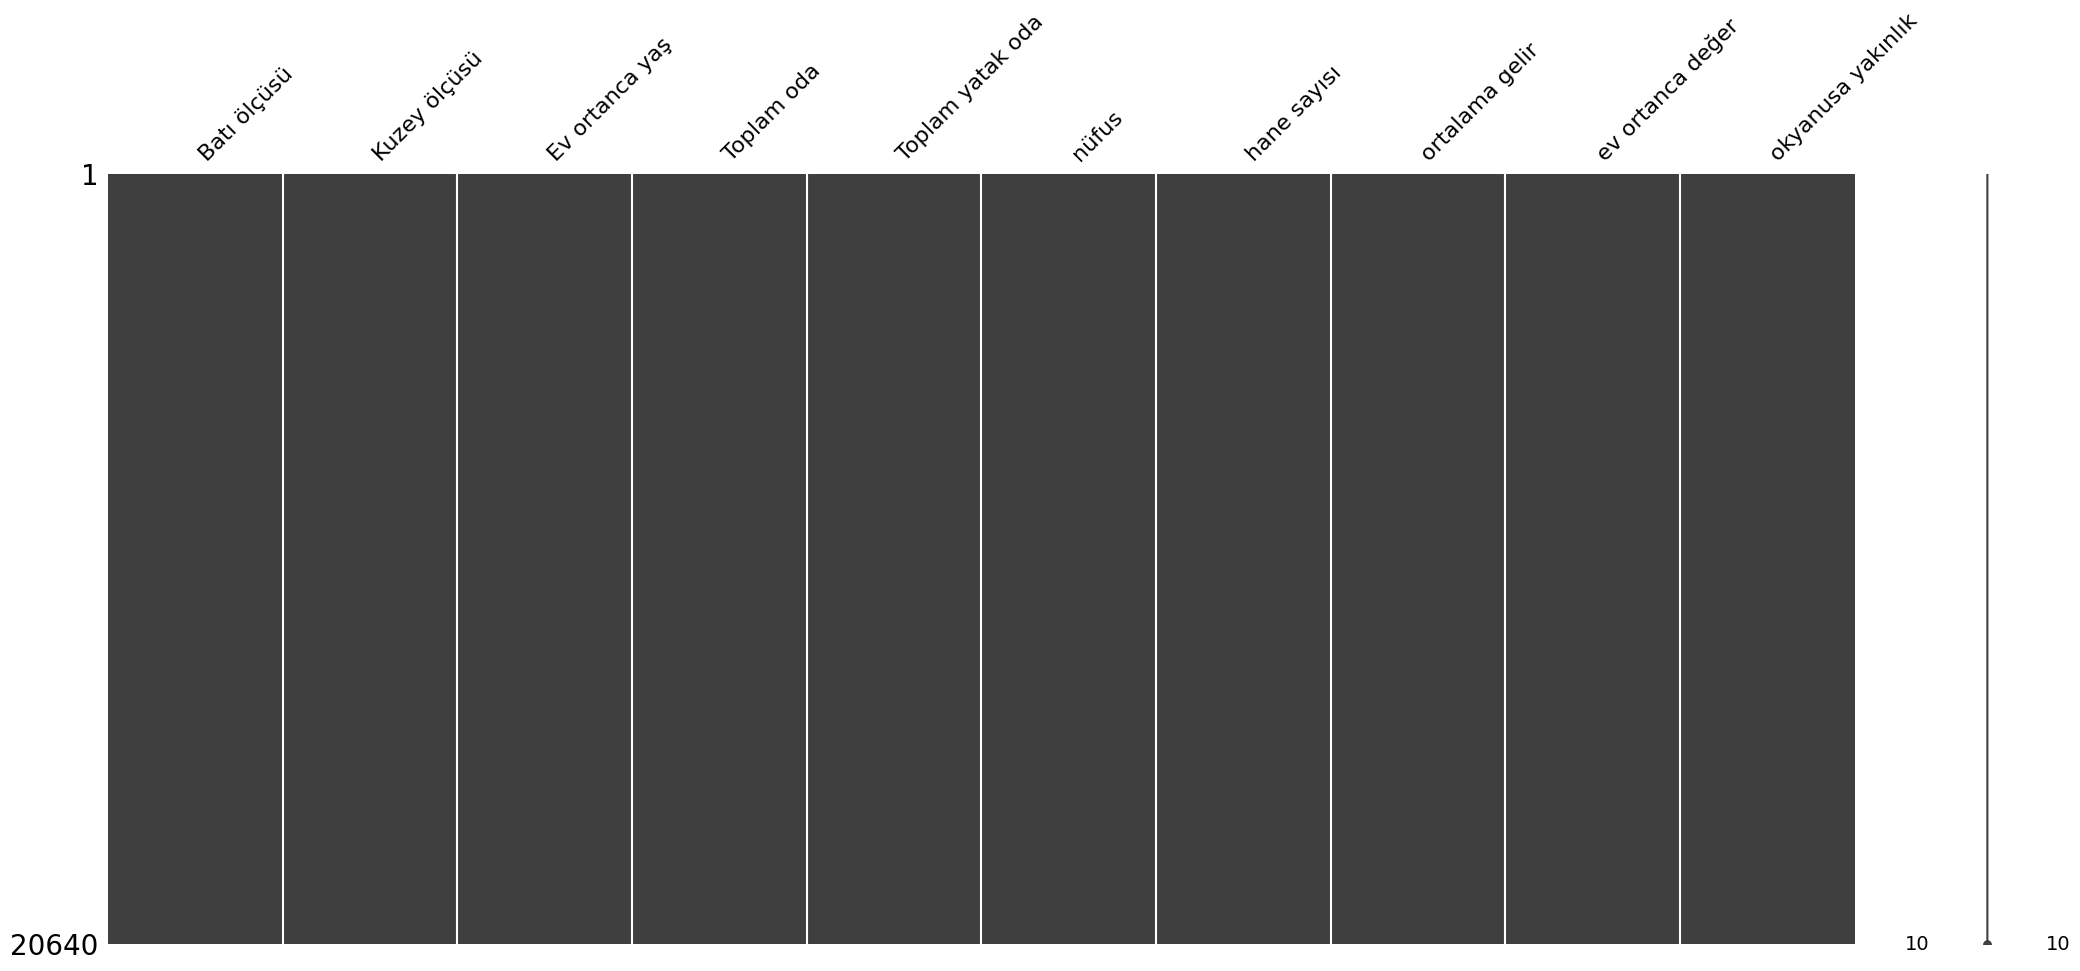

In [ ]:
msno.matrix(df)

In [ ]:
import pandas as pd
eksik_veriler_listesi = df[df.isnull().any(axis=1)]
print("Eksik Verilerin Listesi:\n", eksik_veriler_listesi)

Eksik Verilerin Listesi:
 Empty DataFrame
Columns: [Batı ölçüsü, Kuzey ölçüsü, Ev ortanca yaş, Toplam oda, Toplam yatak oda, nüfus, hane sayısı, ortalama gelir, ev ortanca değer, okyanusa yakınlık]
Index: []


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sayisal_degiskenler = ['Batı ölçüsü', 'Kuzey ölçüsü', 'Ev ortanca yaş', 'Toplam oda', 'Toplam yatak oda', 'nüfus', 'hane sayısı', 'ortalama gelir']
df=df.dropna(subset=sayisal_degiskenler)
df.head()


In [ ]:
df_ortalamagelir=df["ortalama gelir"]

In [ ]:
df_ortalamagelir.head()

0    8.013025
1    8.013025
2    7.257400
3    5.643100
4    3.846200
Name: ortalama gelir, dtype: float64

<Axes: xlabel='ortalama gelir'>

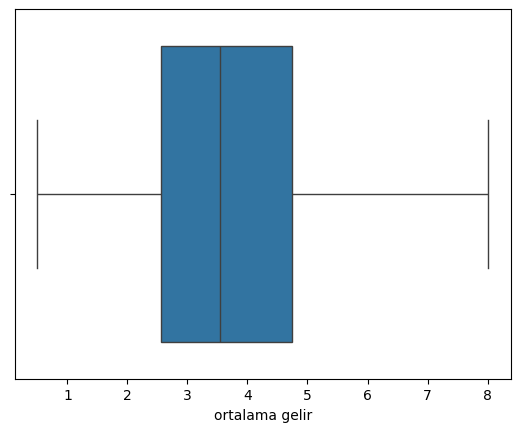

In [ ]:
sns.boxplot(x=df_ortalamagelir)

In [ ]:
for degisken in sayisal_degiskenler:
    Q1 = df[degisken].quantile(0.25)
    Q3 = df[degisken].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR

    df[degisken] = np.where(df[degisken] < alt_sinir, alt_sinir, df[degisken])
    df[degisken] = np.where(df[degisken] > ust_sinir, ust_sinir, df[degisken])

In [ ]:
alt_sinir

-0.7063750000000004

In [ ]:
ust_sinir

8.013024999999999

In [ ]:
(df["ortalama gelir"]<alt_sinir) | (df["ortalama gelir"]>ust_sinir )

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: ortalama gelir, Length: 20640, dtype: bool

In [ ]:
ortalama_gelir_tf = (df["ortalama gelir"]<alt_sinir) | (df["ortalama gelir"]>ust_sinir )

In [ ]:
ortalama_gelir_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: ortalama gelir, dtype: bool

In [ ]:
df_ortalamagelir[ortalama_gelir_tf]

Series([], Name: ortalama gelir, dtype: float64)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
sayisal_degiskenler = ['Batı ölçüsü', 'Kuzey ölçüsü', 'Ev ortanca yaş', 'Toplam oda', 'Toplam yatak oda', 'nüfus', 'hane sayısı', 'ortalama gelir']

for degisken in sayisal_degiskenler:
    z = np.abs(stats.zscore(df[degisken]))
    df = df[(z < 3)]

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['okyanusa yakınlık']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)
print(df.head())

   Batı ölçüsü  Kuzey ölçüsü  Ev ortanca yaş  Toplam oda  Toplam yatak oda  \
0      -122.23         37.88            41.0     880.000             129.0   
1      -122.22         37.86            21.0    5698.375            1106.0   
2      -122.24         37.85            52.0    1467.000             190.0   
3      -122.25         37.85            52.0    1274.000             235.0   
4      -122.25         37.85            52.0    1627.000             280.0   

    nüfus  hane sayısı  ortalama gelir  ev ortanca değer  \
0   322.0        126.0        8.013025          452600.0   
1  2401.0       1092.5        8.013025          358500.0   
2   496.0        177.0        7.257400          352100.0   
3   558.0        219.0        5.643100          341300.0   
4   565.0        259.0        3.846200          342200.0   

   okyanusa yakınlık_<1H OCEAN  okyanusa yakınlık_INLAND  \
0                          0.0                       0.0   
1                          0.0                    

In [ ]:
from sklearn import preprocessing

In [ ]:
preprocessing.scale(df)

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [ ]:
df


Batı ölçüsü  Kuzey ölçüsü  Ev ortanca yaş  Toplam oda  \
0          -122.23         37.88            41.0     880.000   
1          -122.22         37.86            21.0    5698.375   
2          -122.24         37.85            52.0    1467.000   
3          -122.25         37.85            52.0    1274.000   
4          -122.25         37.85            52.0    1627.000   
...            ...           ...             ...         ...   
20635      -121.09         39.48            25.0    1665.000   
20636      -121.21         39.49            18.0     697.000   
20637      -121.22         39.43            17.0    2254.000   
20638      -121.32         39.43            18.0    1860.000   
20639      -121.24         39.37            16.0    2785.000   

       Toplam yatak oda   nüfus  hane sayısı  ortalama gelir  \
0                 129.0   322.0        126.0        8.013025   
1                1106.0  2401.0       1092.5        8.013025   
2                 190.0   496.0        177.0        7.257400   
3                 235.0   558.0        219.0        5.643100   
4                 280.0   565.0        259.0        3.846200   
...                 ...     ...          ...             ...   
20635             374.0   845.0        330.0        1.560300   
20636             150.0   356.0        114.0        2.556800   
20637             485.0  1007.0        433.0        1.700000   
20638             409.0   741.0        349.0        1.867200   
20639             616.0  1387.0        530.0        2.388600   

       ev ortanca değer  okyanusa yakınlık_<1H OCEAN  \
0              452600.0                          0.0   
1              358500.0                          0.0   
2              352100.0                          0.0   
3              341300.0                          0.0   
4              342200.0                          0.0   
...                 ...                          ...   
20635           78100.0                          0.0   
20636           77100.0                          0.0   
20637           92300.0                          0.0   
20638           84700.0                          0.0   
20639           89400.0                          0.0   

       okyanusa yakınlık_INLAND  okyanusa yakınlık_ISLAND  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
20635                       1.0                       0.0   
20636                       1.0                       0.0   
20637                       1.0                       0.0   
20638                       1.0                       0.0   
20639                       1.0                       0.0   

       okyanusa yakınlık_NEAR BAY  okyanusa yakınlık_NEAR OCEAN  
0                             1.0                           0.0  
1                             1.0                           0.0  
2                             1.0                           0.0  
3                             1.0                           0.0  
4                             1.0                           0.0  
...                           ...                           ...  
20635                         0.0                           0.0  
20636                         0.0                           0.0  
20637                         0.0                           0.0  
20638                         0.0                           0.0  
20639                         0.0                           0.0  

[20640 rows x 14 columns]

In [ ]:
preprocessing.normalize(df)

array([[-2.70061253e-04,  8.36940215e-05,  9.05875101e-05, ...,
         0.00000000e+00,  2.20945147e-06,  0.00000000e+00],
       [-3.40866574e-04,  1.05589989e-04,  5.85681399e-05, ...,
         0.00000000e+00,  2.78895904e-06,  0.00000000e+00],
       [-3.47170619e-04,  1.07496793e-04,  1.47683837e-04, ...,
         0.00000000e+00,  2.84007378e-06,  0.00000000e+00],
       ...,
       [-1.31282278e-03,  4.27030210e-04,  1.84111427e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.43191897e-03,  4.65385468e-04,  2.12450886e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.35527430e-03,  4.40095258e-04,  1.78855070e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Batı ölçüsü', 'Kuzey ölçüsü', 'Ev ortanca yaş', 'Toplam oda',
                 'Toplam yatak oda', 'nüfus', 'hane sayısı', 'ortalama gelir']
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)
df = df.drop(numerical_cols, axis=1)
df = pd.concat([df, scaled_df], axis=1)
print(df.head())

   ev ortanca değer  okyanusa yakınlık_<1H OCEAN  okyanusa yakınlık_INLAND  \
0          452600.0                          0.0                       0.0   
1          358500.0                          0.0                       0.0   
2          352100.0                          0.0                       0.0   
3          341300.0                          0.0                       0.0   
4          342200.0                          0.0                       0.0   

   okyanusa yakınlık_ISLAND  okyanusa yakınlık_NEAR BAY  \
0                       0.0                         1.0   
1                       0.0                         1.0   
2                       0.0                         1.0   
3                       0.0                         1.0   
4                       0.0                         1.0   

   okyanusa yakınlık_NEAR OCEAN  Batı ölçüsü  Kuzey ölçüsü  Ev ortanca yaş  \
0                           0.0    -1.327835      1.052548        0.982143   
1                   

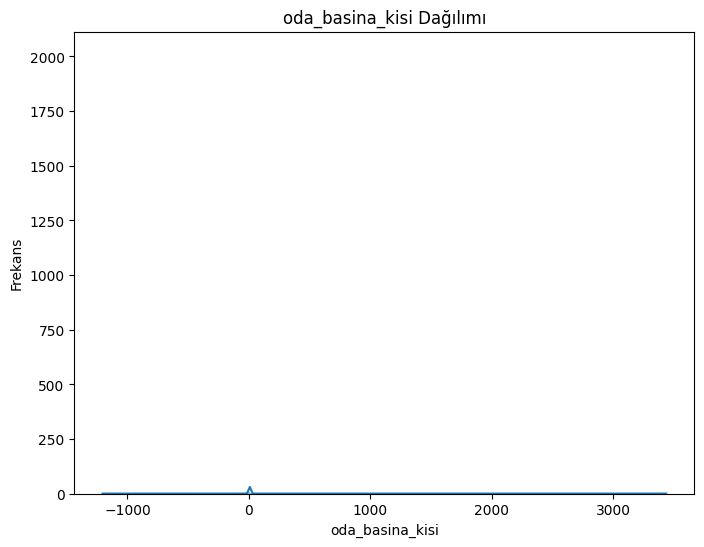

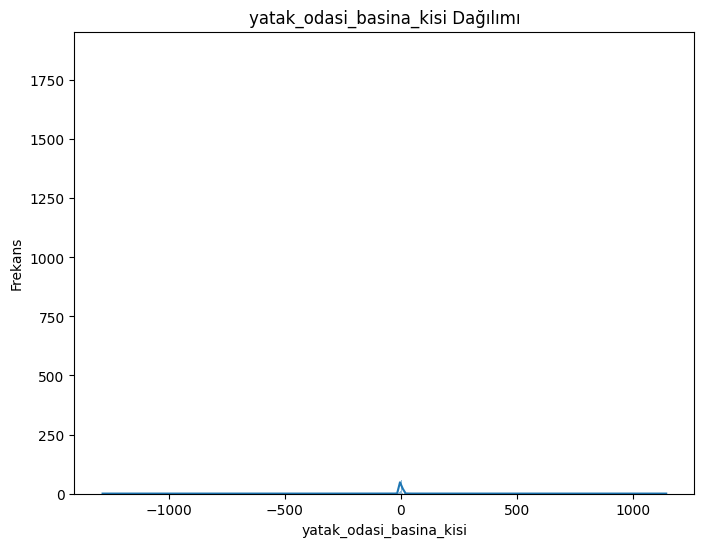

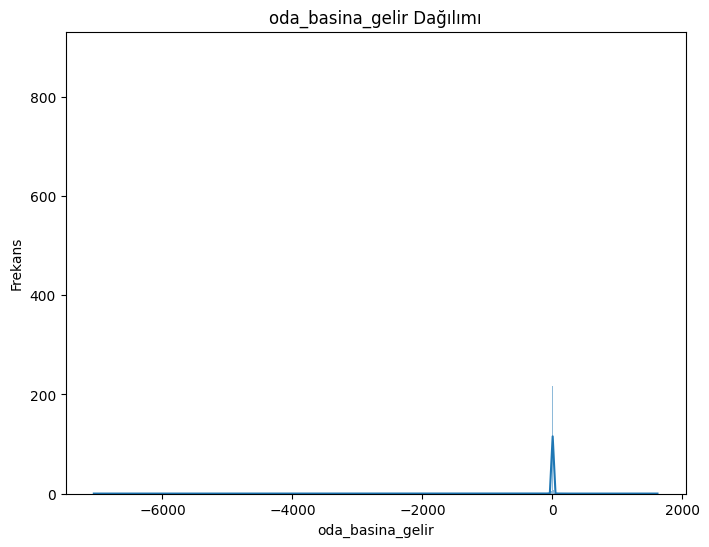

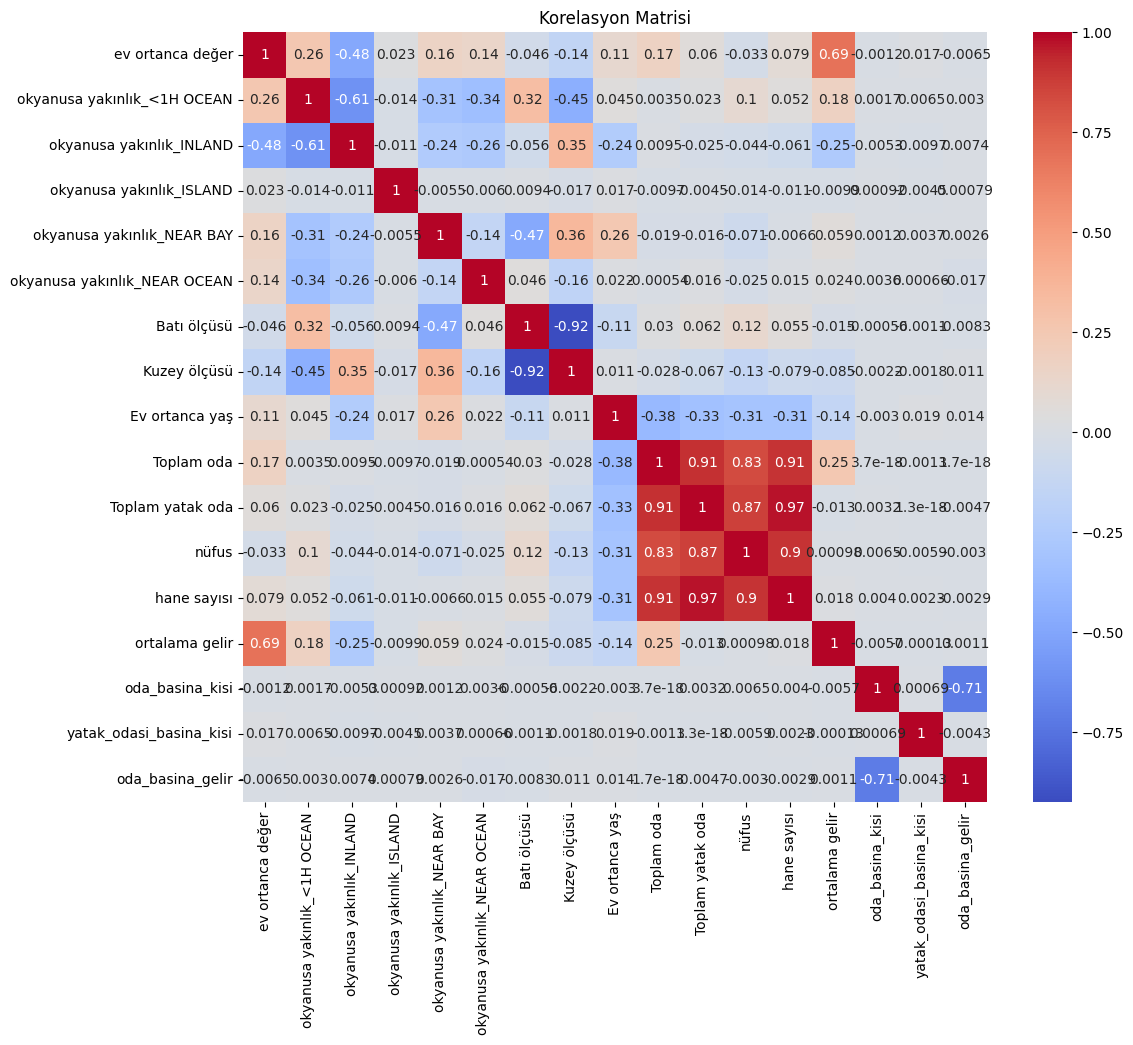

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Yeni öznitelikler oluşturma
df['oda_basina_kisi'] = df['nüfus'] / df['Toplam oda']
df['yatak_odasi_basina_kisi'] = df['nüfus'] / df['Toplam yatak oda']
df['oda_basina_gelir'] = df['ortalama gelir'] / df['Toplam oda']

# Yeni özniteliklerin dağılımlarını görselleştirme
for feature in ['oda_basina_kisi', 'yatak_odasi_basina_kisi', 'oda_basina_gelir']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Dağılımı')
    plt.xlabel(feature)
    plt.ylabel('Frekans')
    plt.show()

# Korelasyon matrisi
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

target_col = 'ev ortanca değer'
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return rmse

lr_model = LinearRegression()
lr_rmse = evaluate_model(lr_model, X_train, y_train, X_test, y_test)
print(f"Linear Regression RMSE: {lr_rmse:.2f}")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_rmse = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
print(f"Random Forest RMSE: {rf_rmse:.2f}")

svm_model = SVR(kernel='linear')
svm_rmse = evaluate_model(svm_model, X_train, y_train, X_test, y_test)
print(f"Support Vector Machines RMSE: {svm_rmse:.2f}")


Linear Regression RMSE: 69989.17
Random Forest RMSE: 49291.82
Support Vector Machines RMSE: 112671.03


In [ ]:
df.corr(numeric_only=True) #df'nin tüm sayısal type'taki kolonlarının birbiriyle korelasyonu

ev ortanca değer  okyanusa yakınlık_<1H OCEAN  \
ev ortanca değer                      1.000000                     0.256617   
okyanusa yakınlık_<1H OCEAN           0.256617                     1.000000   
okyanusa yakınlık_INLAND             -0.484859                    -0.607669   
okyanusa yakınlık_ISLAND              0.023416                    -0.013872   
okyanusa yakınlık_NEAR BAY            0.160284                    -0.314813   
okyanusa yakınlık_NEAR OCEAN          0.141862                    -0.342620   
Batı ölçüsü                          -0.045967                     0.321121   
Kuzey ölçüsü                         -0.144160                    -0.446969   
Ev ortanca yaş                        0.105623                     0.045300   
Toplam oda                            0.171832                     0.003494   
Toplam yatak oda                      0.060147                     0.023013   
nüfus                                -0.032739                     0.103611   
hane sayısı                           0.078723                     0.051671   
ortalama gelir                        0.689001                     0.180143   
oda_basina_kisi                      -0.001153                     0.001748   
yatak_odasi_basina_kisi               0.017011                     0.006462   
oda_basina_gelir                     -0.006494                     0.002965   

                              okyanusa yakınlık_INLAND  \
ev ortanca değer                             -0.484859   
okyanusa yakınlık_<1H OCEAN                  -0.607669   
okyanusa yakınlık_INLAND                      1.000000   
okyanusa yakınlık_ISLAND                     -0.010614   
okyanusa yakınlık_NEAR BAY                   -0.240887   
okyanusa yakınlık_NEAR OCEAN                 -0.262163   
Batı ölçüsü                                  -0.055575   
Kuzey ölçüsü                                  0.351166   
Ev ortanca yaş                               -0.236645   
Toplam oda                                    0.009526   
Toplam yatak oda                             -0.025226   
nüfus                                        -0.044151   
hane sayısı                                  -0.061030   
ortalama gelir                               -0.249290   
oda_basina_kisi                              -0.005323   
yatak_odasi_basina_kisi                      -0.009699   
oda_basina_gelir                              0.007357   

                              okyanusa yakınlık_ISLAND  \
ev ortanca değer                              0.023416   
okyanusa yakınlık_<1H OCEAN                  -0.013872   
okyanusa yakınlık_INLAND                     -0.010614   
okyanusa yakınlık_ISLAND                      1.000000   
okyanusa yakınlık_NEAR BAY                   -0.005499   
okyanusa yakınlık_NEAR OCEAN                 -0.005985   
Batı ölçüsü                                   0.009446   
Kuzey ölçüsü                                 -0.016572   
Ev ortanca yaş                                0.017020   
Toplam oda                                   -0.009656   
Toplam yatak oda                             -0.004483   
nüfus                                        -0.013603   
hane sayısı                                  -0.011282   
ortalama gelir                               -0.009922   
oda_basina_kisi                               0.000921   
yatak_odasi_basina_kisi                      -0.004474   
oda_basina_gelir                              0.000787   

                              okyanusa yakınlık_NEAR BAY  \
ev ortanca değer                                0.160284   
okyanusa yakınlık_<1H OCEAN                    -0.314813   
okyanusa yakınlık_INLAND                       -0.240887   
okyanusa yakınlık_ISLAND                       -0.005499   
okyanusa yakınlık_NEAR BAY                      1.000000   
okyanusa yakınlık_NEAR OCEAN                   -0.135818   
Batı ölçüsü                                    -0.474489   
Kuzey ölçüsü                         

In [ ]:
df.head()

ev ortanca değer  okyanusa yakınlık_<1H OCEAN  okyanusa yakınlık_INLAND  \
0          452600.0                          0.0                       0.0   
1          358500.0                          0.0                       0.0   
2          352100.0                          0.0                       0.0   
3          341300.0                          0.0                       0.0   
4          342200.0                          0.0                       0.0   

   okyanusa yakınlık_ISLAND  okyanusa yakınlık_NEAR BAY  \
0                       0.0                         1.0   
1                       0.0                         1.0   
2                       0.0                         1.0   
3                       0.0                         1.0   
4                       0.0                         1.0   

   okyanusa yakınlık_NEAR OCEAN  Batı ölçüsü  Kuzey ölçüsü  Ev ortanca yaş  \
0                           0.0    -1.327835      1.052548        0.982143   
1                           0.0    -1.322844      1.043185       -0.607019   
2                           0.0    -1.332827      1.038503        1.856182   
3                           0.0    -1.337818      1.038503        1.856182   
4                           0.0    -1.337818      1.038503        1.856182   

   Toplam oda  Toplam yatak oda     nüfus  hane sayısı  ortalama gelir  \
0   -1.117285         -1.313803 -1.325821    -1.291972        2.541006   
1    2.329936          2.125474  1.389936     2.348314        2.541006   
2   -0.697327         -1.099068 -1.098528    -1.099883        2.085156   
3   -0.835405         -0.940657 -1.017539    -0.941691        1.111288   
4   -0.582857         -0.782246 -1.008395    -0.791033        0.027262   

   oda_basina_kisi  yatak_odasi_basina_kisi  oda_basina_gelir  
0         1.186645                 1.009148         -2.274267  
1         0.596555                 0.653942          1.090590  
2         1.575343                 0.999509         -2.990214  
3         1.218019                 1.081732         -1.330239  
4         1.730089                 1.289102         -0.046773

In [ ]:
df.dtypes

ev ortanca değer                float64
okyanusa yakınlık_<1H OCEAN     float64
okyanusa yakınlık_INLAND        float64
okyanusa yakınlık_ISLAND        float64
okyanusa yakınlık_NEAR BAY      float64
okyanusa yakınlık_NEAR OCEAN    float64
Batı ölçüsü                     float64
Kuzey ölçüsü                    float64
Ev ortanca yaş                  float64
Toplam oda                      float64
Toplam yatak oda                float64
nüfus                           float64
hane sayısı                     float64
ortalama gelir                  float64
oda_basina_kisi                 float64
yatak_odasi_basina_kisi         float64
oda_basina_gelir                float64
dtype: object

In [ ]:
import numpy as np
y=np.array(df["ev ortanca değer"])
x=np.array(df.drop("ev ortanca değer",axis=1))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear=LinearRegression()

In [ ]:
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear.score(X_test,y_test)

0.6500374052387397

In [ ]:
linear.score(X_train,y_train)

0.6654186528495738

In [ ]:
print(linear.predict(X_test)[0:10])

[236332.77569613 131656.11286091 118532.64975995 333360.55058616
 338120.57653275 312870.35997532 277026.70573265 216780.84916371
 184670.23162489 254520.81300504]


In [ ]:
print('Ktsayı: \n',linear.coef_)
print('Sabit: \n',linear.intercept_)

Ktsayı: 
 [-2.40903884e+04 -6.01915216e+04  1.38491354e+05 -3.18641963e+04
 -2.23452481e+04 -4.94980575e+04 -5.10343422e+04  1.57022265e+04
 -2.28000693e+04  4.49660030e+04 -5.22037842e+04  3.47173021e+04
  7.82363897e+04 -2.34624372e+01  4.15552348e+01 -2.19294543e+01]
Sabit: 
 243086.69931514043


In [ ]:
yeni_veri = np.array([[-122.24, 37.85, 52.0, 1467.0, 190.0, 496.0, 177.0, 7.2574,
                       0, 0, 0, 0, 0, 0, 0, 0]])
linear.predict(yeni_veri)

array([-76349333.78971313])

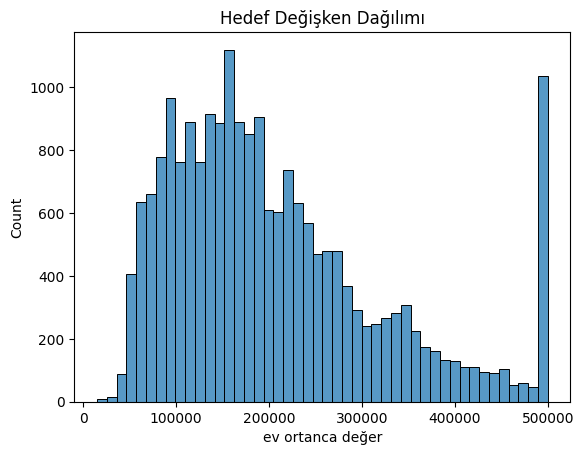

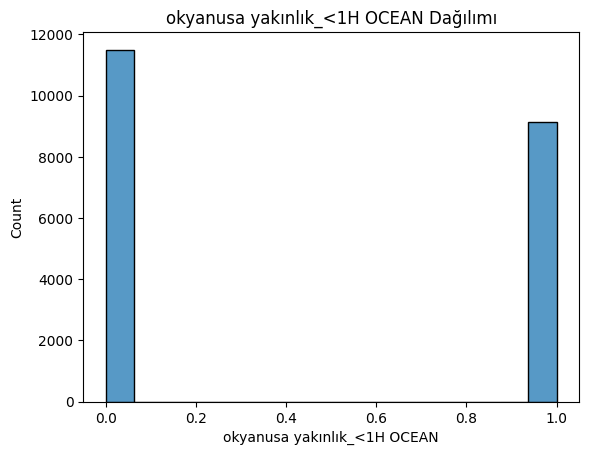

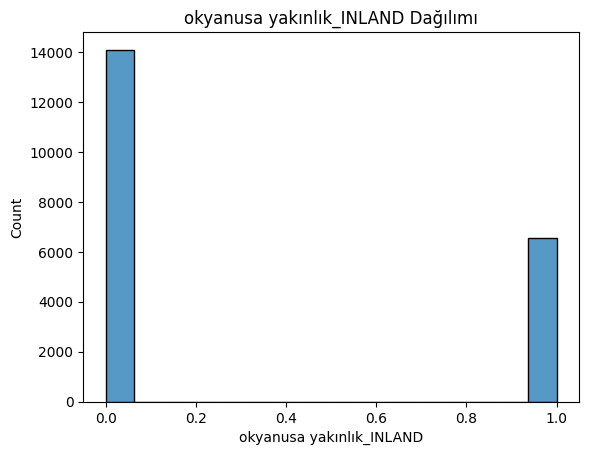

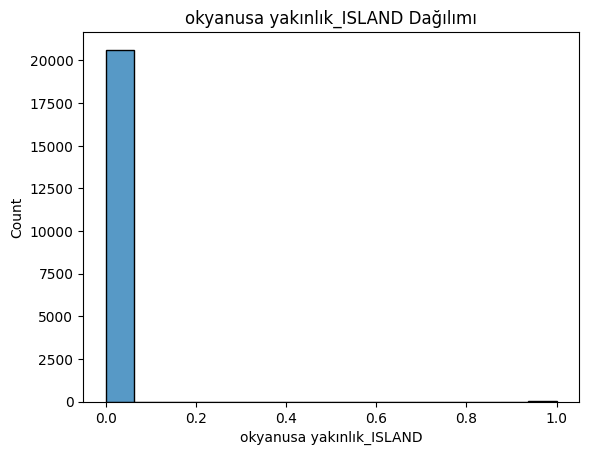

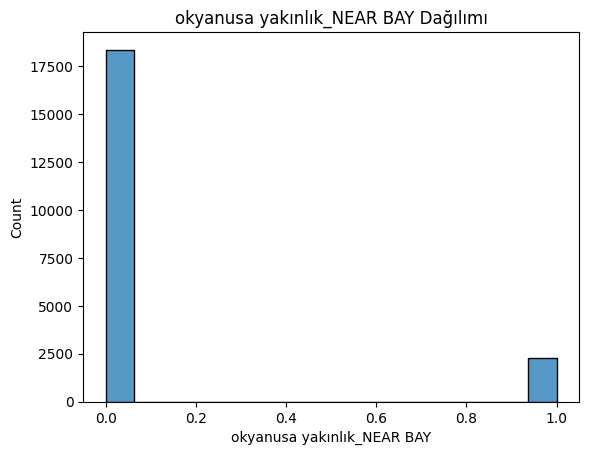

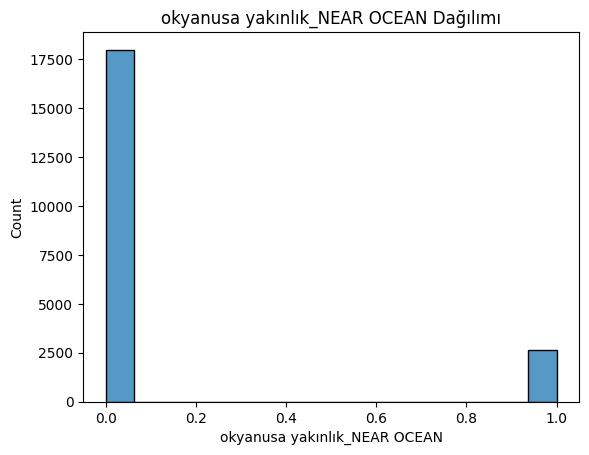

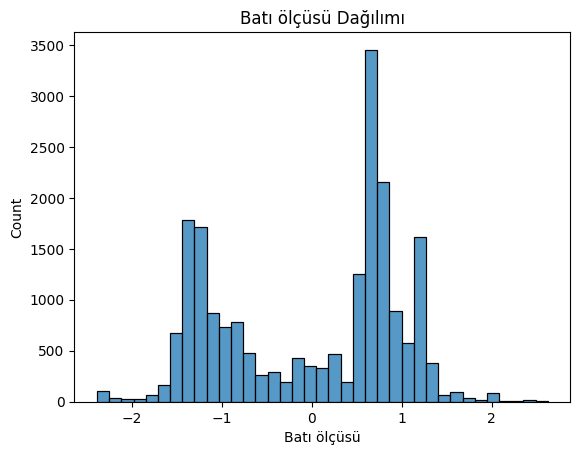

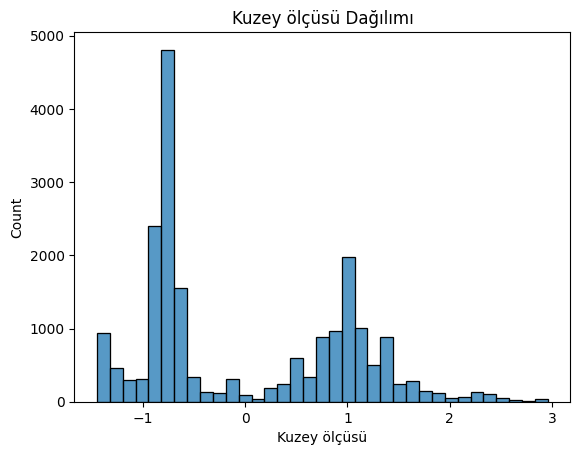

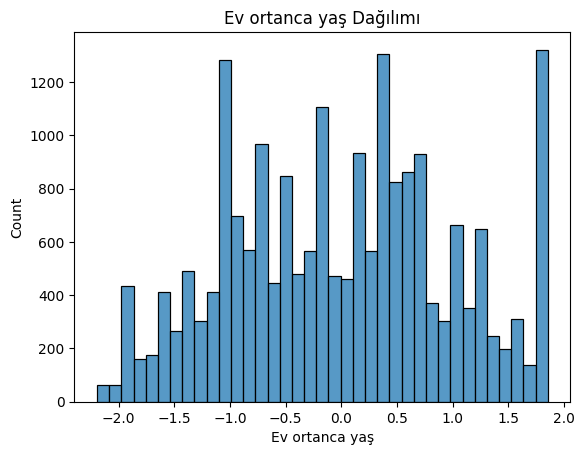

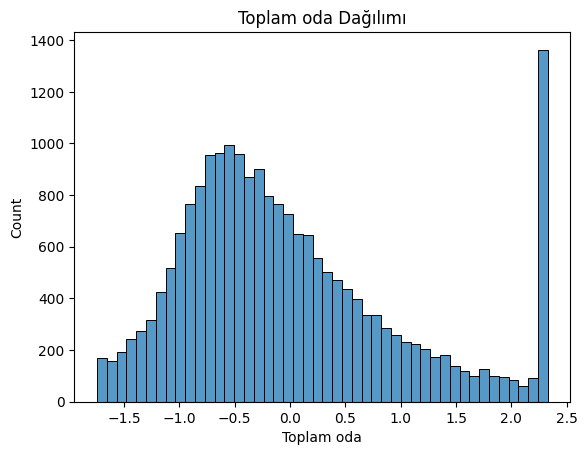

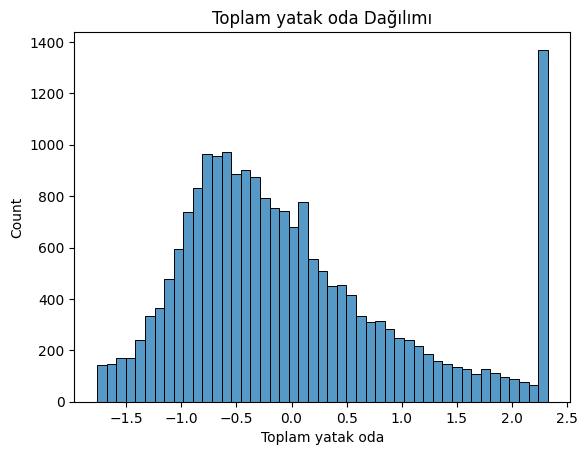

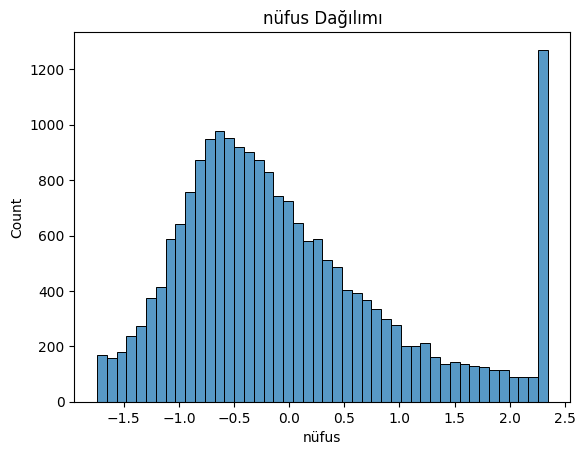

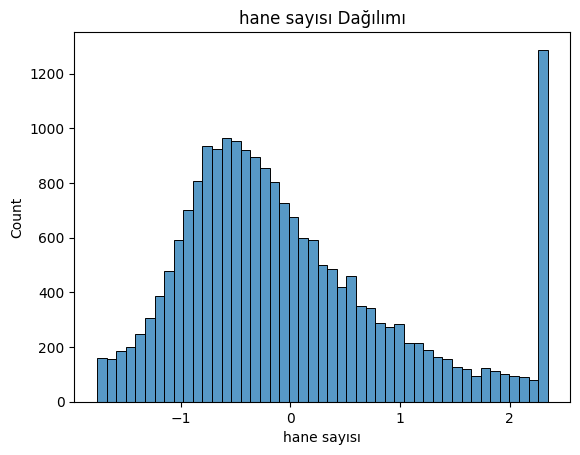

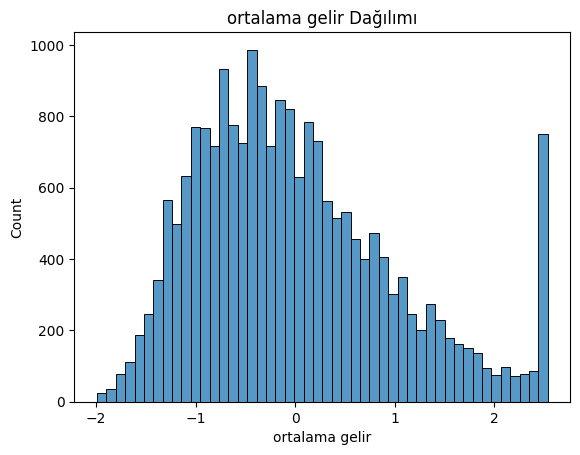

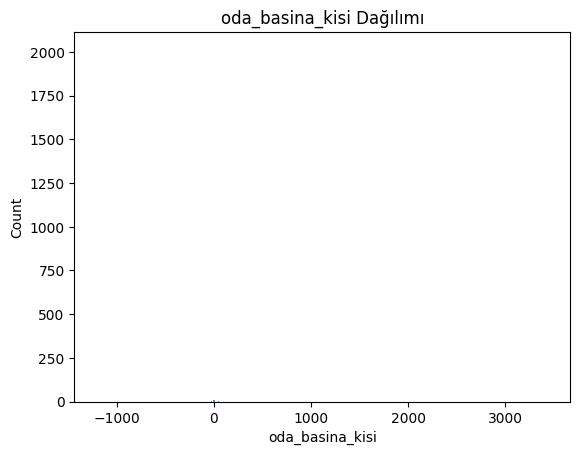

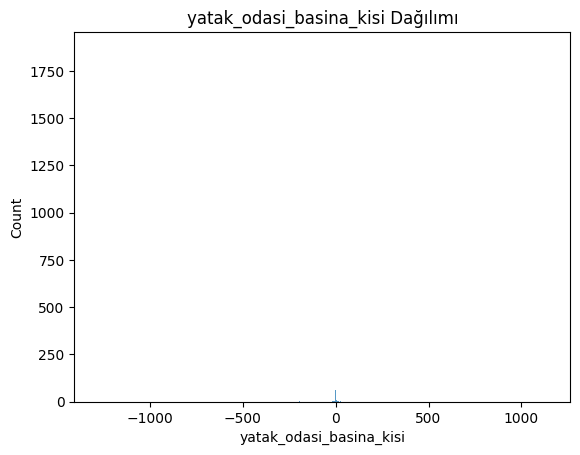

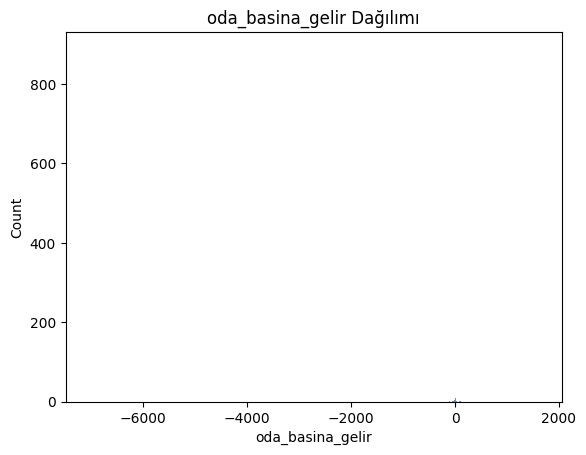

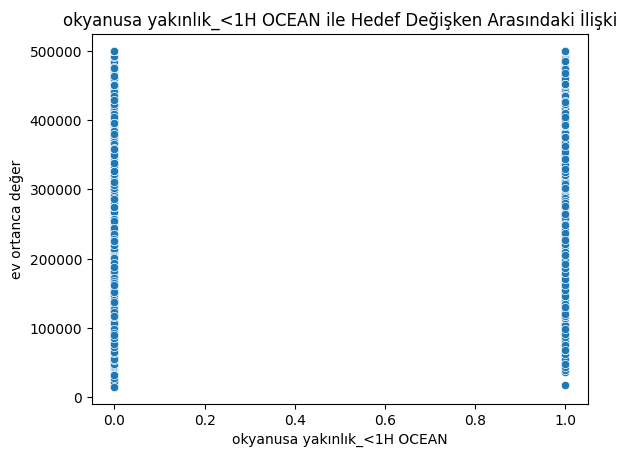

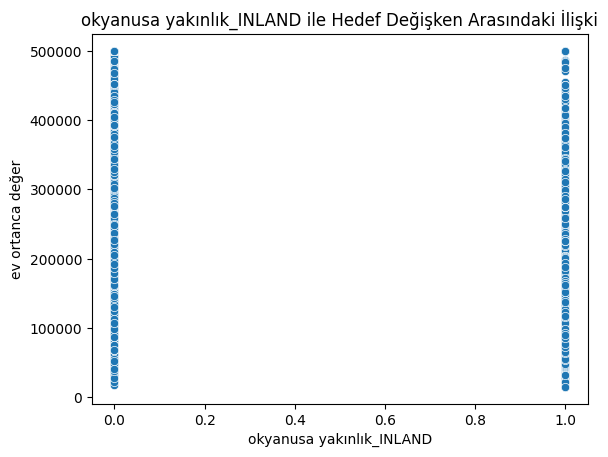

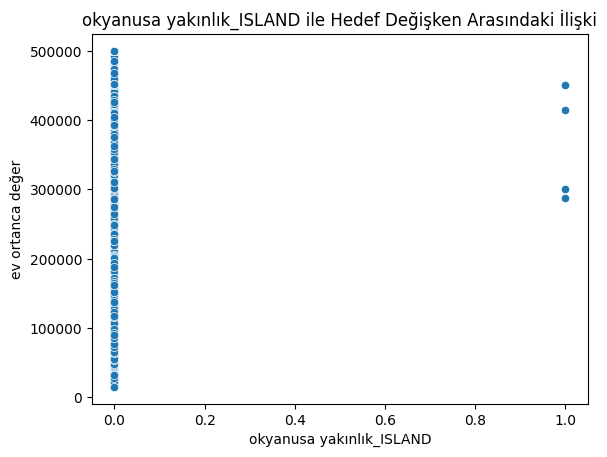

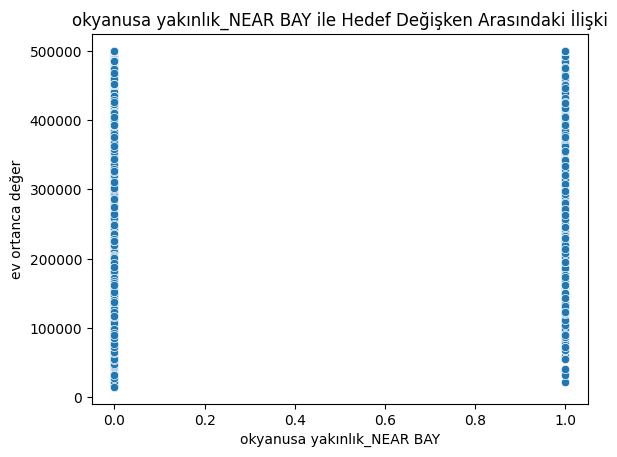

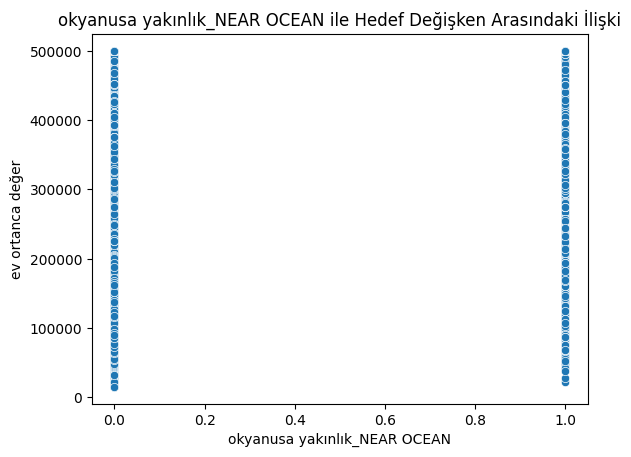

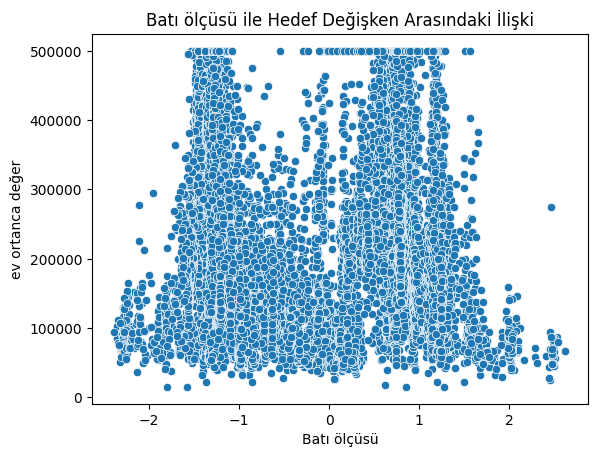

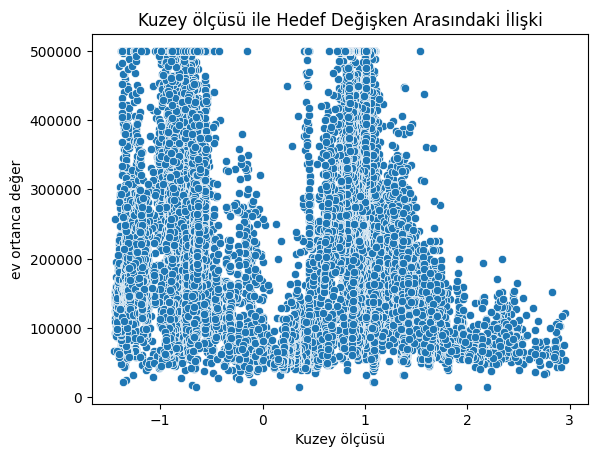

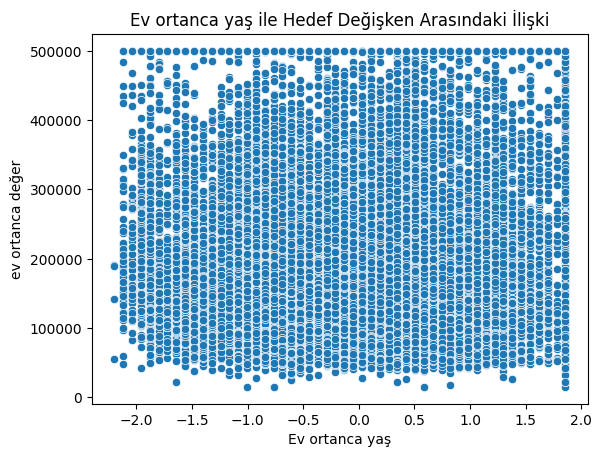

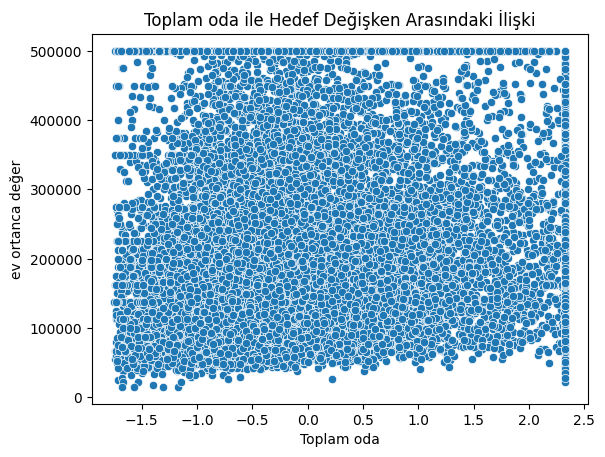

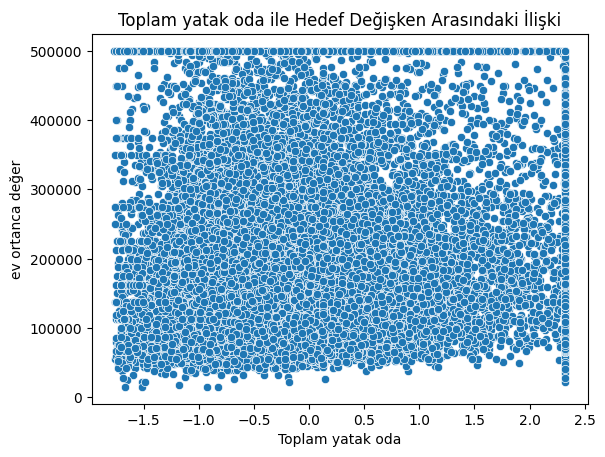

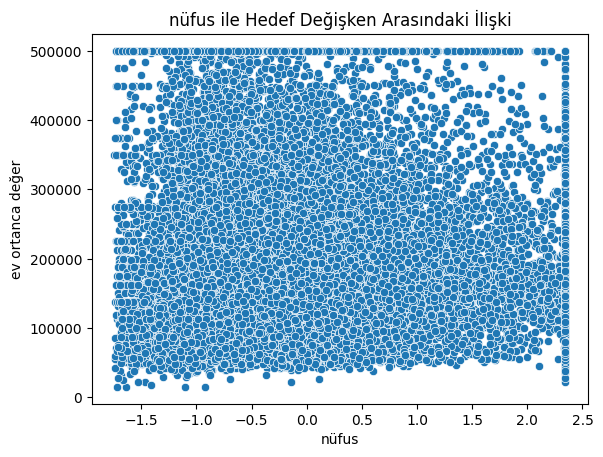

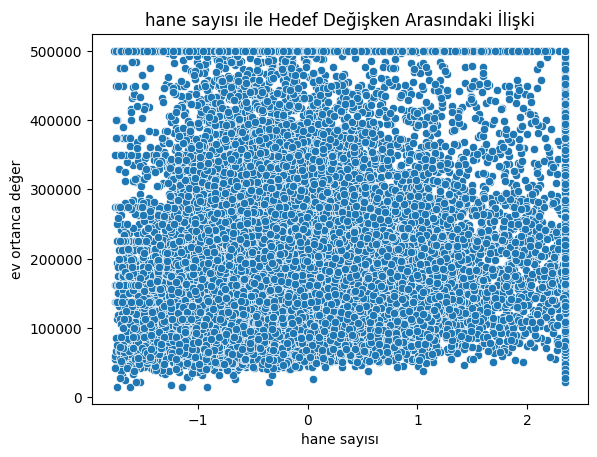

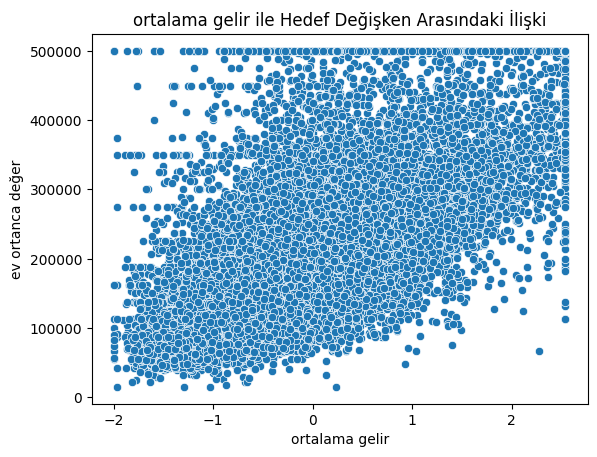

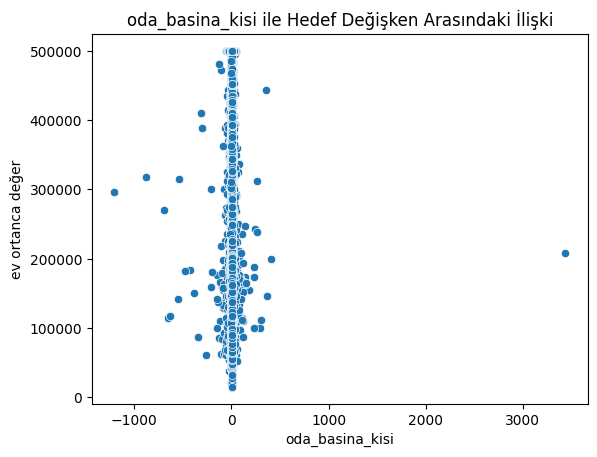

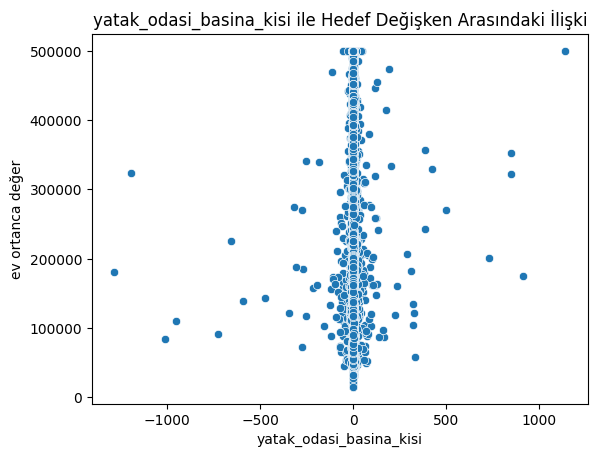

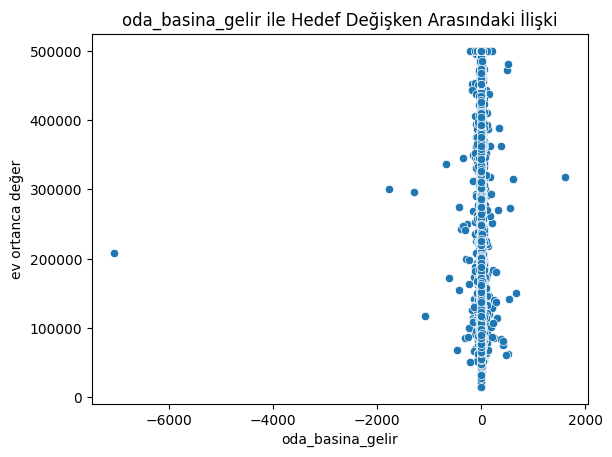

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['ev ortanca değer'])
plt.title('Hedef Değişken Dağılımı')
plt.show()

for col in df.columns:
    if col != 'ev ortanca değer':
        sns.histplot(df[col])
        plt.title(f'{col} Dağılımı')
        plt.show()
for col in df.columns:
    if col != 'ev ortanca değer':
        sns.scatterplot(x=col, y='ev ortanca değer', data=df)
        plt.title(f'{col} ile Hedef Değişken Arasındaki İlişki')
        plt.show()

In [ ]:
import seaborn as sns

<Axes: >

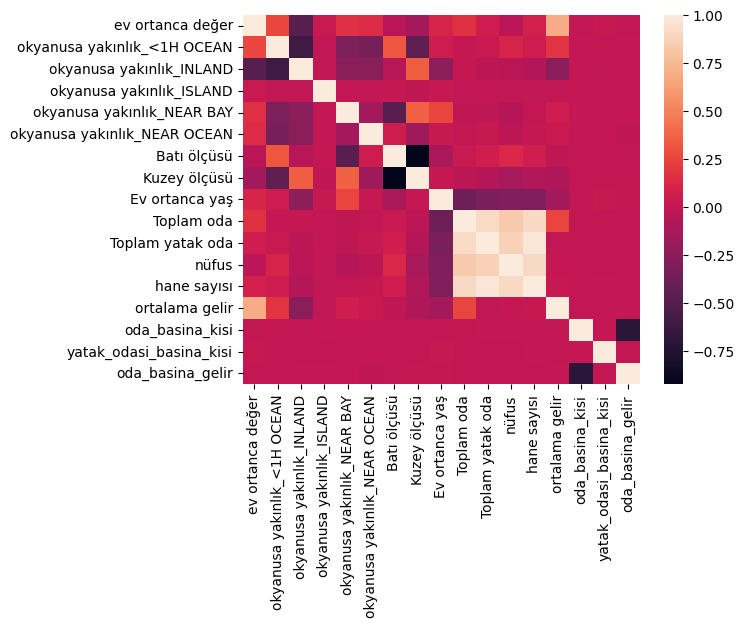

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

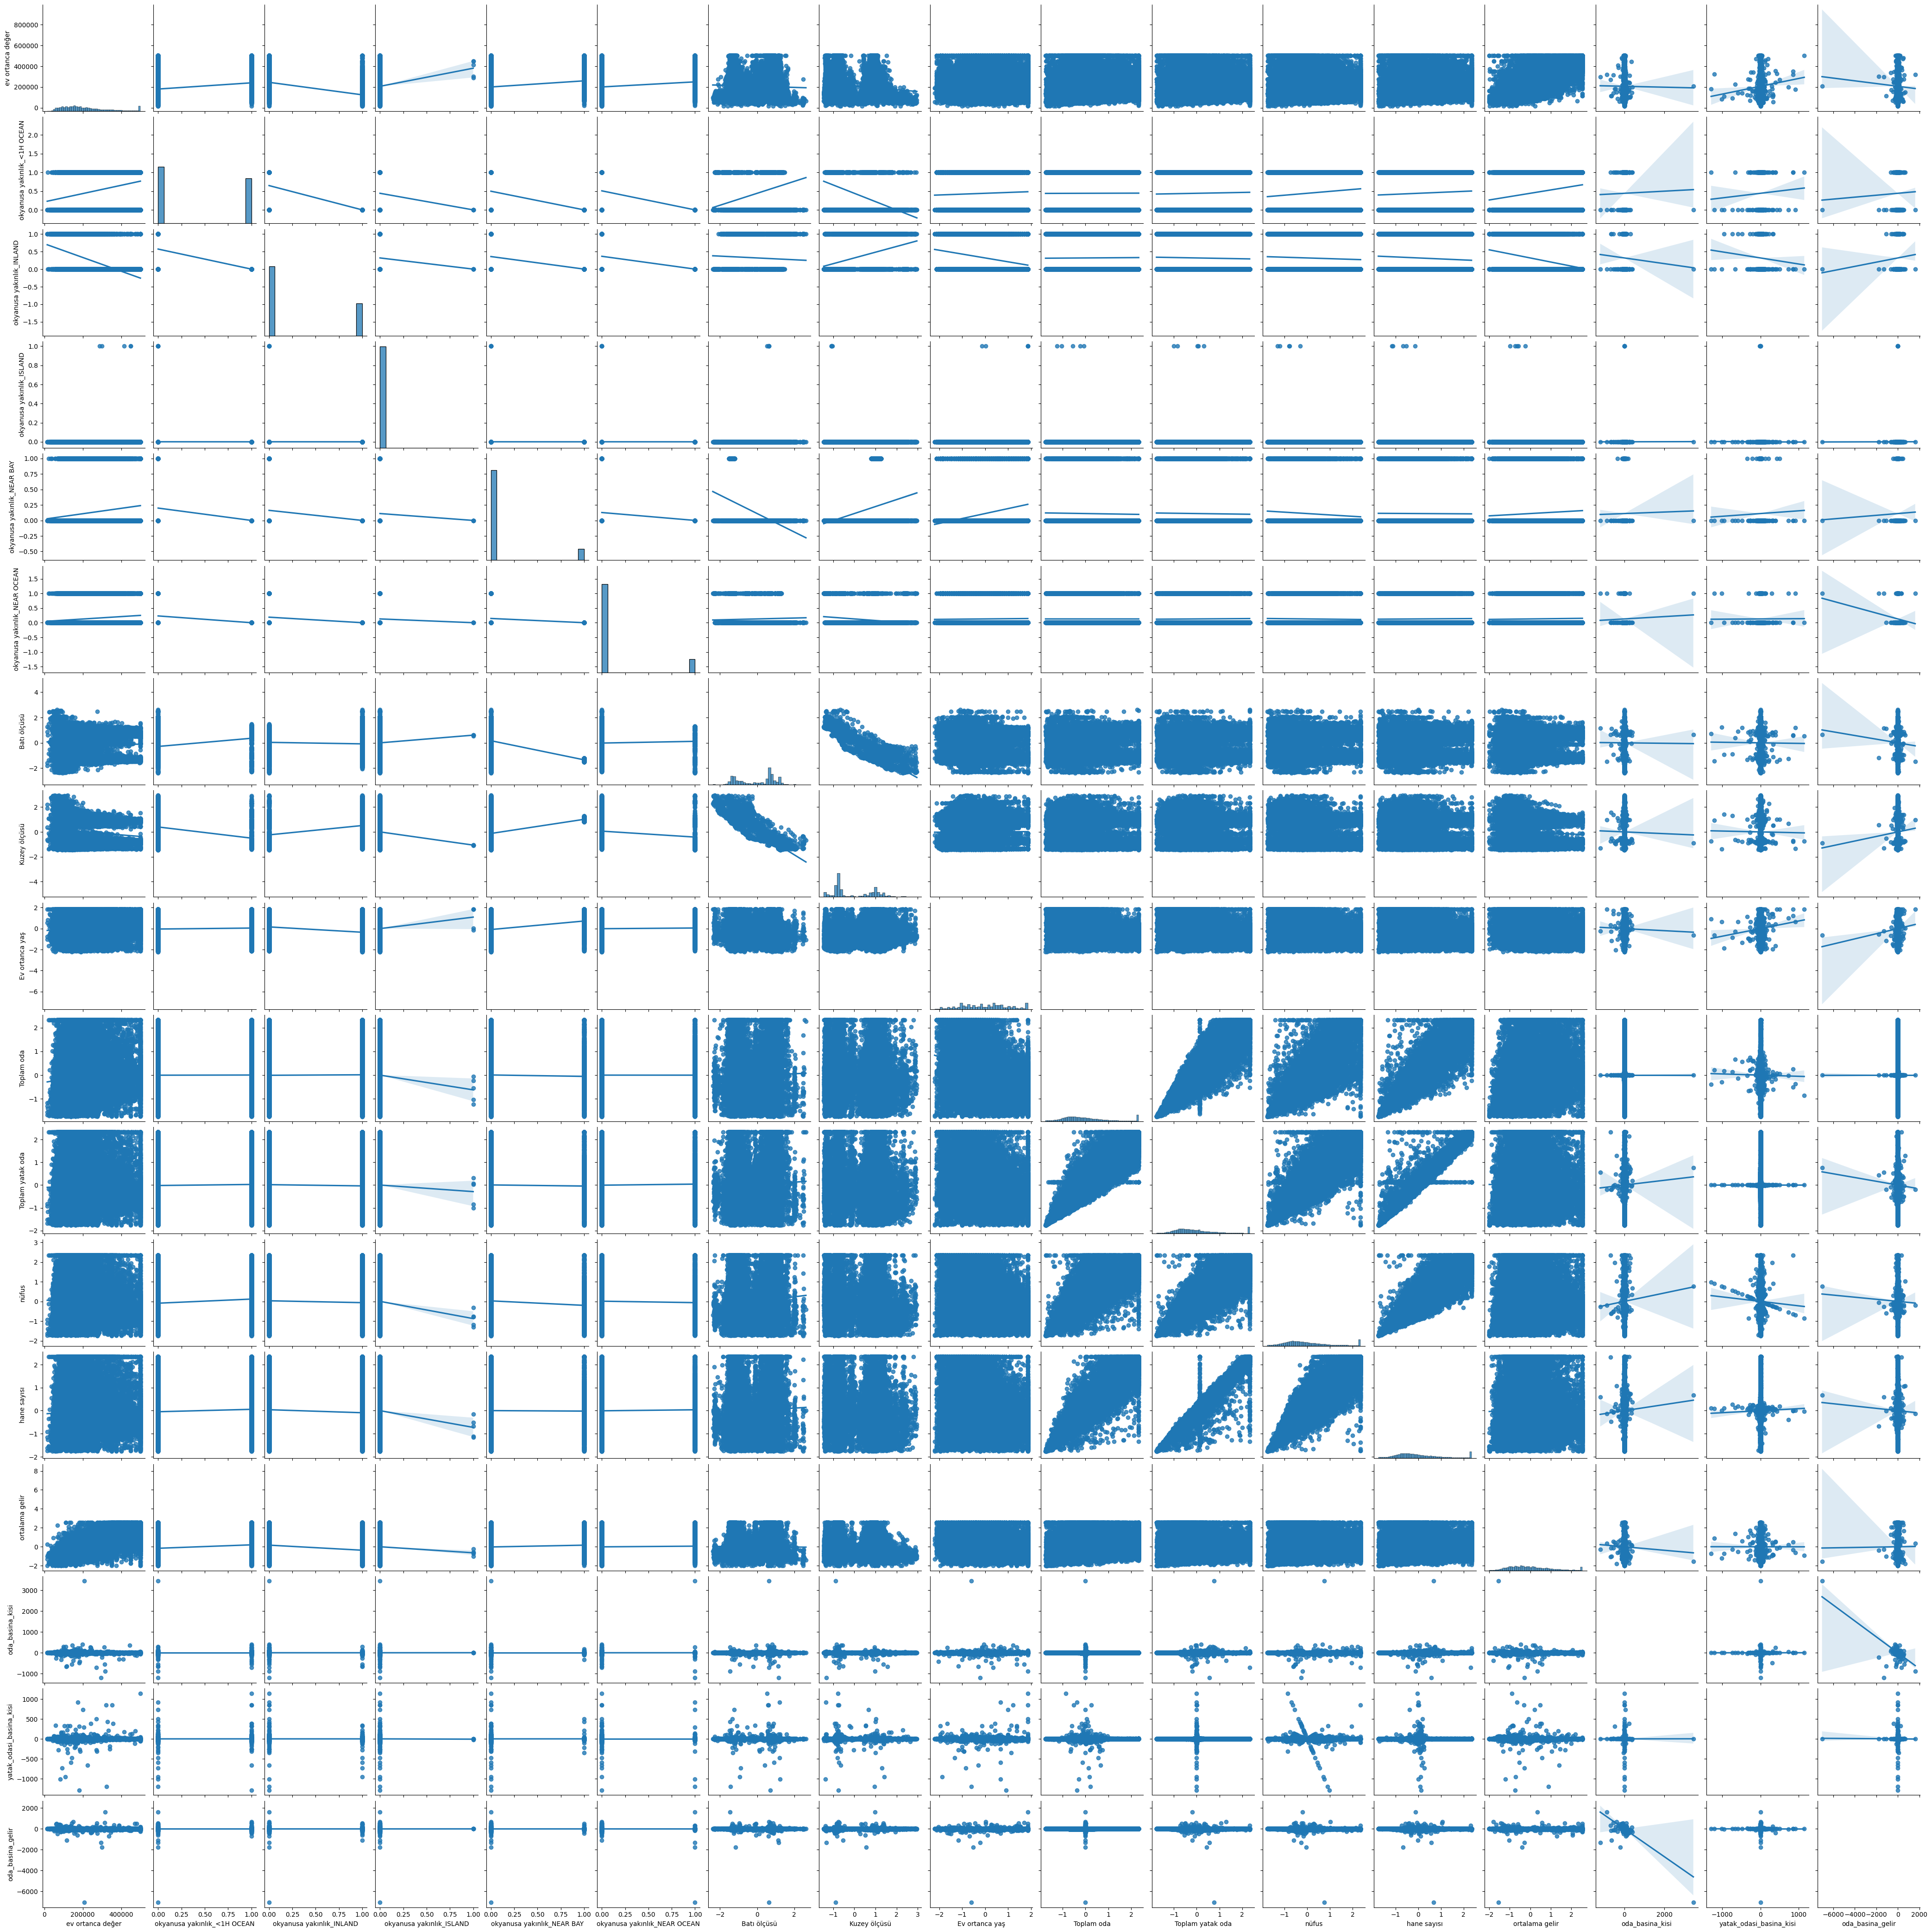

In [ ]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

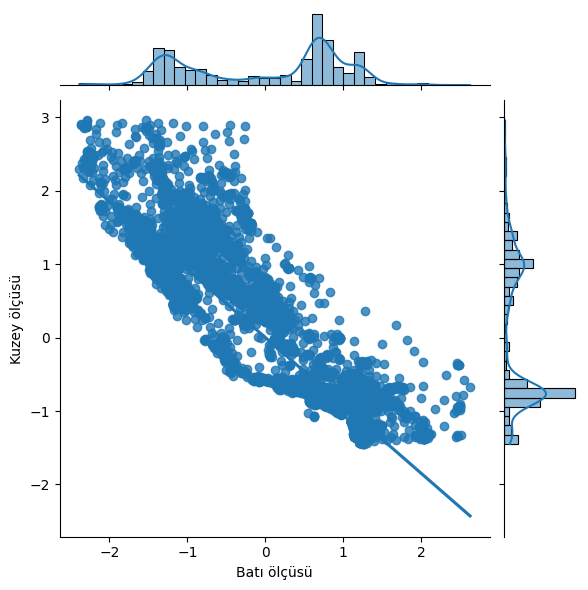

In [ ]:
sns.jointplot(x = "Batı ölçüsü", y = "Kuzey ölçüsü", data = df, kind = "reg")

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[["Batı ölçüsü"]]
y = df["Kuzey ölçüsü"]
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 24)
reg = LinearRegression()
model = reg.fit(X_train, y_train)
model.intercept_ # kesişim noktası


0.0012457205469738465

In [ ]:
model.coef_

array([-0.92703812])

In [ ]:
model.predict(X_test)[0:10]

array([-0.43819507, -0.88239974, -0.88239974, -0.71119586, -0.78060284,
        1.06562283,  1.14891121,  0.39006156, -0.97494238, -0.81299276])

In [ ]:
reg.score(X_train, y_train)


0.8562575696090489

In [ ]:
reg.score(X_test, y_test)

0.8512423684053363

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

x = housing.data
y = housing.target

print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
!pip install mglearn # Ensure mglearn is installed
from sklearn.datasets import fetch_california_housing # Import directly from sklearn

# Load the California housing dataset
housing = fetch_california_housing()

# Get the data and target variable
x, y = housing.data, housing.target

In [ ]:
x.shape

(20640, 8)

In [ ]:
y.shape

(20640,)

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(x,y,random_state = 0)


In [ ]:
reg=LinearRegression().fit(X_train,y_train)

In [ ]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.6109633715458153
0.5911695436410476


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

target_col = 'ev ortanca değer'
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

model = LinearRegression()
model.fit(X_train_sample, y_train_sample)

predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Linear Regression RMSE: {rmse:.2f}")


Linear Regression RMSE: 70373.05


Linear Regression RMSE: 70373.05


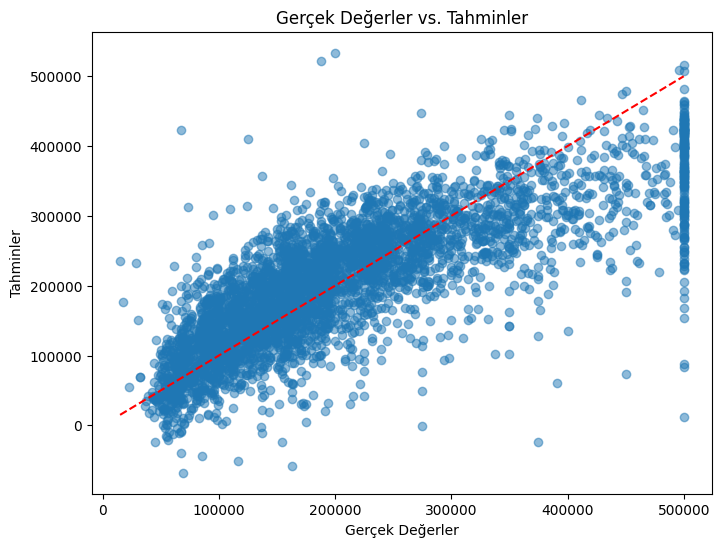

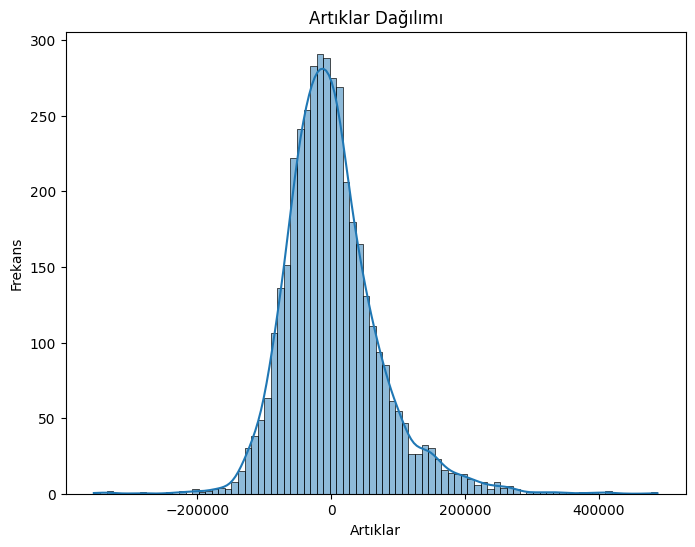

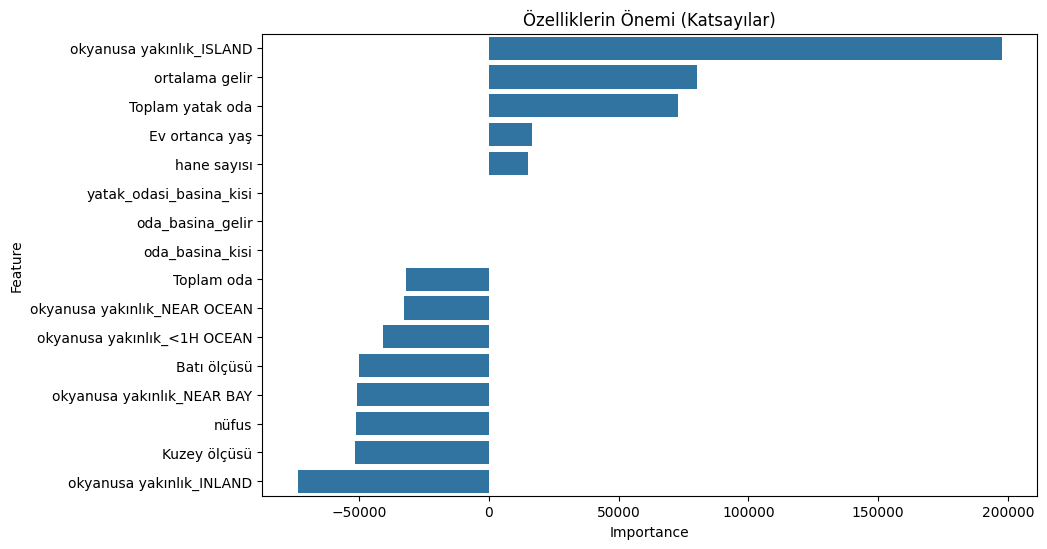

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
target_col = 'ev ortanca değer'
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

model = LinearRegression()
model.fit(X_train_sample, y_train_sample)

predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Linear Regression RMSE: {rmse:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek Değerler vs. Tahminler")
plt.show()

residuals = y_test - predictions
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Artıklar")
plt.ylabel("Frekans")
plt.title("Artıklar Dağılımı")
plt.show()
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Özelliklerin Önemi (Katsayılar)")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
target_col = 'ev ortanca değer'
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)
model = LinearRegression()
model.fit(X_train_sample, y_train_sample)
predictions = model.predict(X_test)
model = LinearRegression()
model.fit(X_train_sample, y_train_sample)
predictions = model.predict(X_test)
son_tahmin = predictions[-1]
print(f"Son Tahmin Değeri: {son_tahmin:.2f}")

Son Tahmin Değeri: 174142.83
